# Filtering example in Python

for comparison with [Julia's version](Filtering%20example.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Implementation of Exponential smoothing

In [2]:
np.random.seed(0)
u = np.random.normal(size=1000).cumsum()

In [3]:
def smooth(u, a):
    y = np.zeros_like(u)
    
    y[0] = (1-a)*u[0]
    for k in range(1,len(u)):
        y[k] = a*y[k-1] + (1-a)*u[k]
    
    return y

## Plot

with Matplotlib

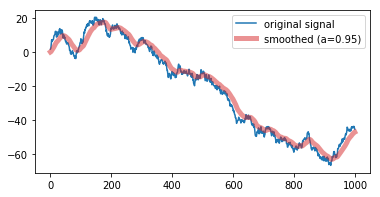

In [4]:
plt.figure(figsize=(6,3))

a = 0.95
plt.plot(u);
plt.plot(smooth(u, a), color="C3", lw=5, alpha=0.5);
plt.legend(["original signal", "smoothed (a={})".format(a)]);

## 2) Performance analysis

In [6]:
np.random.seed(0)
u = np.random.normal(size=10**7).cumsum()

In [7]:
%time smooth(u, 0.9);

CPU times: user 4.38 s, sys: 8 ms, total: 4.39 s
Wall time: 4.4 s


array([1.76405235e-01, 3.75185667e-01, 6.51961854e-01, ...,
       3.02749004e+03, 3.02761749e+03, 3.02765817e+03])

In [8]:
%timeit smooth(u, 0.9);

4.37 s ± 63.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


almost ~**4.4 s** for 10 Mpts, that way more than in Julia (70 ms)

## 3) Alternative implementations

### 3a) Scipy's `lfilter`

[scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

In [9]:
from scipy.signal import lfilter

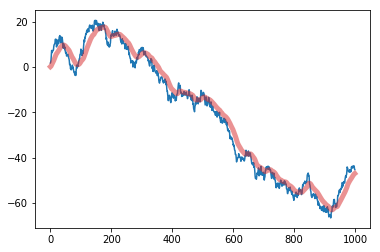

In [10]:
np.random.seed(0)
u = np.random.normal(size=1000).cumsum()

y = lfilter([.05], [1, -0.95], u)

# check that it works
plt.plot(u);
plt.plot(y, color="C3", lw=5, alpha=0.5);

#### Timing of lfilter

In [11]:
np.random.seed(0)
u = np.random.normal(size=10**7).cumsum()

In [13]:
%timeit lfilter([.05], [1, -0.95], u)

71.6 ms ± 933 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**70 ms** for 10 Mpts, that's almost equal to Julia's naive version (70 ms)! 

### Numba  jit

http://numba.pydata.org/

In [14]:
from numba import jit

In [15]:
@jit
def smooth_jit(u, a):
    y = np.zeros_like(u)
    
    y[0] = (1-a)*u[0]
    for k in range(1,len(u)):
        y[k] = a*y[k-1] + (1-a)*u[k]
    
    return y

In [16]:
smooth_jit(u, 0.9).shape

(10000000,)

In [17]:
%timeit smooth_jit(u, 0.9);

51.9 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**50 ms**, this is better than the specialized `lfilter` function coded in C! And close to the Julia speed when using Performance annotation.